1. Statistiques descriptives et analyse préliminaire
1.1 Statistiques descriptives

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm

df = pd.read_excel("donnees_immobilieres_extended.xlsx")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      150 non-null    int64  
 1   Surface_m2              150 non-null    float64
 2   Chambres                150 non-null    int64  
 3   Annee_construction      150 non-null    int64  
 4   Distance_centre_km      150 non-null    float64
 5   Etage                   150 non-null    int64  
 6   Ascenseur               150 non-null    int64  
 7   Annee_vente             150 non-null    int64  
 8   Qualite_ecole           150 non-null    float64
 9   Revenu_median_quartier  150 non-null    float64
 10  Distance_universite     150 non-null    float64
 11  Prix_milliers_euros     150 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 14.2 KB
None


In [2]:
print(df.describe())

               ID  Surface_m2    Chambres  Annee_construction  \
count  150.000000  150.000000  150.000000          150.000000   
mean    75.500000  116.706800    2.886667         2001.826667   
std     43.445368   37.693819    1.077760           11.704841   
min      1.000000   15.210000    1.000000         1980.000000   
25%     38.250000   93.240000    2.000000         1991.000000   
50%     75.500000  117.845000    3.000000         2002.500000   
75%    112.750000  139.637500    4.000000         2012.000000   
max    150.000000  218.530000    5.000000         2022.000000   

       Distance_centre_km       Etage   Ascenseur  Annee_vente  Qualite_ecole  \
count          150.000000  150.000000  150.000000   150.000000     150.000000   
mean            16.500267    2.580000    0.460000  2019.840000       5.468667   
std              9.017430    1.761901    0.500067     2.288225       1.868249   
min              0.830000    0.000000    0.000000  2015.000000       1.000000   
25%      

In [56]:
sk = df["Prix_milliers_euros"].skew()
print(sk)

0.1562305046809055


Interprétation :
≈ 0 → symétrique
> 0 → asymétrie à droite
< 0 → asymétrie à gauche

In [57]:
kurt = df["Prix_milliers_euros"].kurt()
print (kurt)

-0.4687214247542908


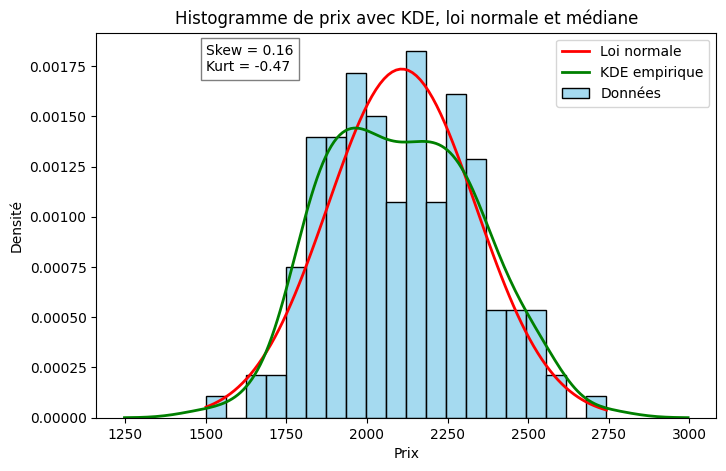

In [5]:
plt.figure(figsize=(8,5))

# Histogramme avec densité
sns.histplot(df["Prix_milliers_euros"], kde=False, stat='density', bins=20, color='skyblue', label='Données')

# Calculer la moyenne et l'écart-type
mu = df["Prix_milliers_euros"].mean()
sigma = df["Prix_milliers_euros"].std()

# Générer la loi normale
x = np.linspace(df["Prix_milliers_euros"].min(), df["Prix_milliers_euros"].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2, label='Loi normale')

# Courbe KDE empirique (suivant les données)
sns.kdeplot(df["Prix_milliers_euros"], color='green', lw=2, label='KDE empirique')

# Ajouter skew et kurtosis sur le graphique
plt.text(df["Prix_milliers_euros"].min(), plt.ylim()[1]*0.9, f'Skew = {sk:.2f}\nKurt = {kurt:.2f}', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title("Histogramme de prix avec KDE, loi normale et médiane")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.legend()
plt.show()

1.2 Analyse de corrélation

In [6]:
corr_matrix = df.corr()
print(corr_matrix)

                              ID  Surface_m2  Chambres  Annee_construction  \
ID                      1.000000    0.041265 -0.043645            0.056342   
Surface_m2              0.041265    1.000000  0.590959           -0.034333   
Chambres               -0.043645    0.590959  1.000000            0.039398   
Annee_construction      0.056342   -0.034333  0.039398            1.000000   
Distance_centre_km     -0.022305   -0.074765 -0.102319           -0.088117   
Etage                   0.101838    0.061126  0.048986           -0.044559   
Ascenseur              -0.158938   -0.062416 -0.014694           -0.100949   
Annee_vente             0.012962    0.060417  0.036140           -0.055920   
Qualite_ecole           0.051749    0.043832 -0.012775           -0.009887   
Revenu_median_quartier -0.098747    0.013908  0.011761            0.030304   
Distance_universite    -0.054580   -0.088362 -0.089609           -0.006250   
Prix_milliers_euros     0.031379    0.826731  0.614825          

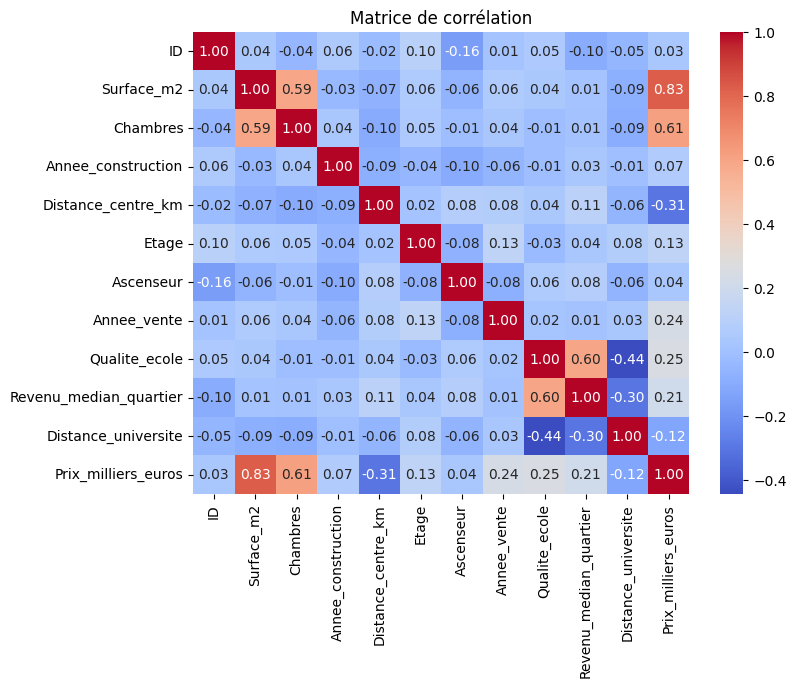

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

2. Le Modèle Linéaire : estimation et interprétation
2.1 Modèle de régression linéaire simple

From stats - notebook1.
y = prix (donnée dépendante)
x = surface

In [8]:
# Exercise 1B: Manual OLS estimation

# TODO: Calculate sample means of x and y
y = df["Prix_milliers_euros"]
x = df["Surface_m2"]

x_bar = np.mean(x)
y_bar = np.mean(y)

# TODO: Calculate b1_hat using the OLS formula
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar)**2)
b1_hat = numerator / denominator

# TODO: Calculate b0_hat
b0_hat = y_bar - b1_hat * x_bar

# TODO: Calculate fitted values: y_hat
y_hat = b0_hat + b1_hat * x 

# TODO: Calculate residuals: u_hat
u_hat = y - y_hat

print("OLS Estimates (Manual):")
print(f"b0_hat = {b0_hat:.4f}")
print(f"b1_hat = {b1_hat:.4f}")
print(f"\nMean of residuals: {np.mean(u_hat):.6f} (should be ≈ 0)")

OLS Estimates (Manual):
b0_hat = 1519.3743
b1_hat = 5.0428

Mean of residuals: 0.000000 (should be ≈ 0)


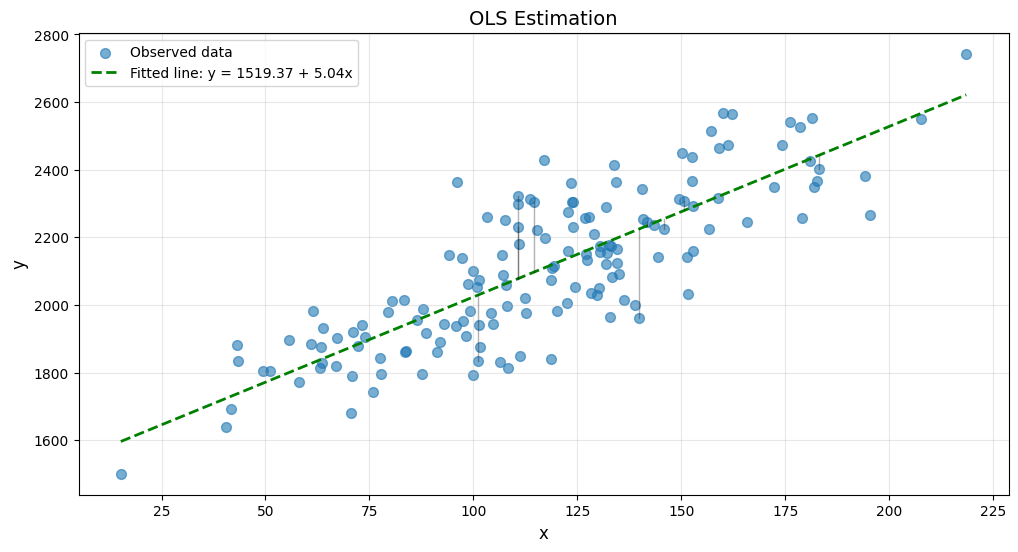

In [9]:
# Exercise 1C: Visualize OLS fit

plt.figure(figsize=(12, 6))

# Sort for smooth line plotting
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_hat_sorted = y_hat[sort_idx]

# TODO: Create a scatter plot of observed data
plt.scatter(x, y, alpha=0.6, label='Observed data', s=50)

# TODO: Plot the OLS fitted line
plt.plot(x_sorted, y_hat_sorted, 'g--', label=f'Fitted line: y = {b0_hat:.2f} + {b1_hat:.2f}x', linewidth=2)

# Show residuals for first 10 points (already implemented)
for i in range(10):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], 'k-', alpha=0.3, linewidth=1)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('OLS Estimation', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# Exercise 1D: Calculate R-squared

# TODO: Calculate SST (Total Sum of Squares)
SST = np.sum((y - y_bar)**2)

# TODO: Calculate SSR (Explained Sum of Squares)
SSR = np.sum((y_hat - y_bar)**2)

# TODO: Calculate SSE (Residual Sum of Squares)
SSE = np.sum((y - y_hat)**2)
#SSE = np.sum(u_hat**2)

# TODO: Calculate R-squared using Method 1: R2 = SSR / SST
R2_method1 = SSR / SST

# TODO: Calculate R-squared using Method 2: R2 = 1 - SSE / SST
R2_method2 = 1 - SSE / SST

print("Analysis of Variance:")
print(f"SST (Total Sum of Squares): {SST:.4f}")
print(f"SSR (Explained Sum of Squares): {SSR:.4f}")
print(f"SSE (Residual Sum of Squares): {SSE:.4f}")
print(f"\nVerification: SST = SSR + SSE?")
print(f"{SST:.4f} = {SSR:.4f} + {SSE:.4f} = {SSR + SSE:.4f}")
print(f"\nR² (Method 1: SSR/SST): {R2_method1:.4f}")
print(f"R² (Method 2: 1 - SSE/SST): {R2_method2:.4f}")
print(f"\nInterpretation: {R2_method1*100:.2f}% of the variance in y is explained by x")

Analysis of Variance:
SST (Total Sum of Squares): 7876687.1845
SSR (Explained Sum of Squares): 5383592.2807
SSE (Residual Sum of Squares): 2493094.9039

Verification: SST = SSR + SSE?
7876687.1845 = 5383592.2807 + 2493094.9039 = 7876687.1845

R² (Method 1: SSR/SST): 0.6835
R² (Method 2: 1 - SSE/SST): 0.6835

Interpretation: 68.35% of the variance in y is explained by x


In [11]:
n = df.shape[0]        # nombre d'observations
p = 1                  # nombre de variables explicatives

R2_adj = 1 - (1 - R2_method1) * (n - 1) / (n - p - 1)
print("R² ajusté :", R2_adj)

R² ajusté : 0.6813457128760424


Avec une seule variable explicative, R² et R² ajusté sont presque identiques.
Si tu ajoutes d’autres variables, R² ajusté devient utile pour voir si elles améliorent vraiment le modèle.

B0 = prix de base quand surface = 0
B1 = variation du prix par unité de surface

2.2 Modèle de régression linéaire multiple

In [12]:
# Exercise 5: Multiple Linear Regression

X_matrix = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur" ]].values
y_multi = df["Prix_milliers_euros"]
X_matrix = np.column_stack([np.ones(len(df)), X_matrix])

# TODO: Implement OLS using matrix algebra
# b_hat = (X'X)^(-1) X'y
XtX = X_matrix.T @ X_matrix
XtX_inv = np.linalg.inv(XtX)
Xty = X_matrix.T @ y_multi
b_hat_multi = XtX_inv @ Xty

print("Multiple Linear Regression Results:\n")
print("True coefficients:")
#print(f"b0 = {b_true[0]}, b1 = {b_true[1]}, b2 = {b_true[2]}, b3 = {b_true[3]}")
print("\nEstimated coefficients:")
print(f"b0_hat = {b_hat_multi[0]:.4f}")
print(f"b1_hat = {b_hat_multi[1]:.4f}")
print(f"b2_hat = {b_hat_multi[2]:.4f}")
print(f"b3_hat = {b_hat_multi[3]:.4f}")
print(f"b4_hat = {b_hat_multi[4]:.4f}")
print(f"b5_hat = {b_hat_multi[5]:.4f}")
print(f"b6_hat = {b_hat_multi[6]:.4f}")

# Calculate fitted values and residuals
y_hat_multi = X_matrix @ b_hat_multi
u_hat_multi = y_multi - y_hat_multi

# Calculate R-squared
SST_multi = np.sum((y_multi - np.mean(y_multi))**2)
SSE_multi = np.sum(u_hat_multi**2)
R2_multi = 1 - SSE_multi / SST_multi

# Calculate adjusted R-squared
k = X_matrix.shape[1]  # number of parameters
R2_adj_multi = 1 - (len(df) - 1) / (len(df) - k) * (1 - R2_multi)

print(f"\nR² = {R2_multi:.4f}")
print(f"Adjusted R² = {R2_adj_multi:.4f}")

Multiple Linear Regression Results:

True coefficients:

Estimated coefficients:
b0_hat = -1679.4908
b1_hat = 4.3879
b2_hat = 33.9205
b3_hat = 1.6093
b4_hat = -6.1446
b5_hat = 12.2540
b6_hat = 55.5141

R² = 0.7887
Adjusted R² = 0.7798


B0 = intercept, -1679.4908
B1 = coefficient surface, 4.3879
B2 = coefficient chambres, 33.9205
B3 = coefficient annees construction, 1.6093
B4 = coefficient distance centre, -6.1446
B5 = coefficient etage, 12.2540
B6 = coefficient ascenseur, 55.5141

In [13]:
# Exercise 5B: Verify with statsmodels

model_multi = sm.OLS(y_multi, X_matrix).fit()
print("Statsmodels OLS Summary:")
print(model_multi.summary())

# Compare estimates
print("\n" + "="*60)
print("Comparison of estimates:")
print("="*60)
print(f"{'Parameter':<12} {'Manual':<12} {'Statsmodels':<12} {'Difference':<12}")
print("-"*60)
for i in range(len(b_hat_multi)):
    diff = abs(b_hat_multi[i] - model_multi.params[i])
    print(f"b{i:<11} {b_hat_multi[i]:<12.6f} {model_multi.params[i]:<12.6f} {diff:<12.8f}")



Statsmodels OLS Summary:
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.789
Model:                             OLS   Adj. R-squared:                  0.780
Method:                  Least Squares   F-statistic:                     88.94
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                         15:13:45   Log-Likelihood:                -911.43
No. Observations:                  150   AIC:                             1837.
Df Residuals:                      143   BIC:                             1858.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1679.

C:\Users\alize\AppData\Local\Temp\ipykernel_14436\1854246588.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = abs(b_hat_multi[i] - model_multi.params[i])
C:\Users\alize\AppData\Local\Temp\ipykernel_14436\1854246588.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"b{i:<11} {b_hat_multi[i]:<12.6f} {model_multi.params[i]:<12.6f} {diff:<12.8f}")


2.3 Transformation logarithmique

In [14]:
# Fit different models
models = {}

# 1. Linear-Linear
X_multi_const = sm.add_constant(X_matrix)
models['linear-linear'] = sm.OLS(y_multi, X_multi_const).fit()

# 2. Log-Linear
X_multi_const = sm.add_constant(X_matrix)
Y_multi_log = np.log(y_multi)
models['log-linear'] = sm.OLS(Y_multi_log, X_multi_const).fit()

# 3. Linear-Log
'''X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
models['linear-log'] = sm.OLS(y_multi, X_multi_log_const).fit()'''

# 4. Log-Log
X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
Y_multi_log = np.log(y_multi)
models['log-log'] = sm.OLS(Y_multi_log, X_multi_log_const).fit()

# Compare R-squared values
print("Model Comparison:\n")
for name, model in models.items():
    print(f"{name:15} R² = {model.rsquared:.4f}")
    print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}, \n"
          f"                              b2 = {model.params[2]:.4f}, b3 = {model.params[3]:.4f}, \n"
          f"                              b4 = {model.params[4]:.4f}, b5 = {model.params[5]:.4f}, b6 = {model.params[6]:.4f} ")
    print()

Model Comparison:

linear-linear   R² = 0.7887
                Coefficients: b0 = -1679.4908, b1 = 4.3879, 
                              b2 = 33.9205, b3 = 1.6093, 
                              b4 = -6.1446, b5 = 12.2540, b6 = 55.5141 

log-linear      R² = 0.7916
                Coefficients: b0 = 5.8413, b1 = 0.0021, 
                              b2 = 0.0152, b3 = 0.0008, 
                              b4 = -0.0030, b5 = 0.0053, b6 = 0.0265 

log-log         R² = 0.7356
                Coefficients: b0 = -1100749.8256, b1 = 0.1955, 
                              b2 = 0.0475, b3 = 1.0343, 
                              b4 = -0.0249, b5 = 0.0009, b6 = 0.0019 



C:\Users\alize\AppData\Local\Temp\ipykernel_14436\1895855202.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}, \n"
C:\Users\alize\AppData\Local\Temp\ipykernel_14436\1895855202.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"                              b2 = {model.params[2]:.4f}, b3 = {model.params[3]:.4f}, \n"
C:\Users\alize\AppData\Local\Temp\ipykernel_14436\1895855202.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

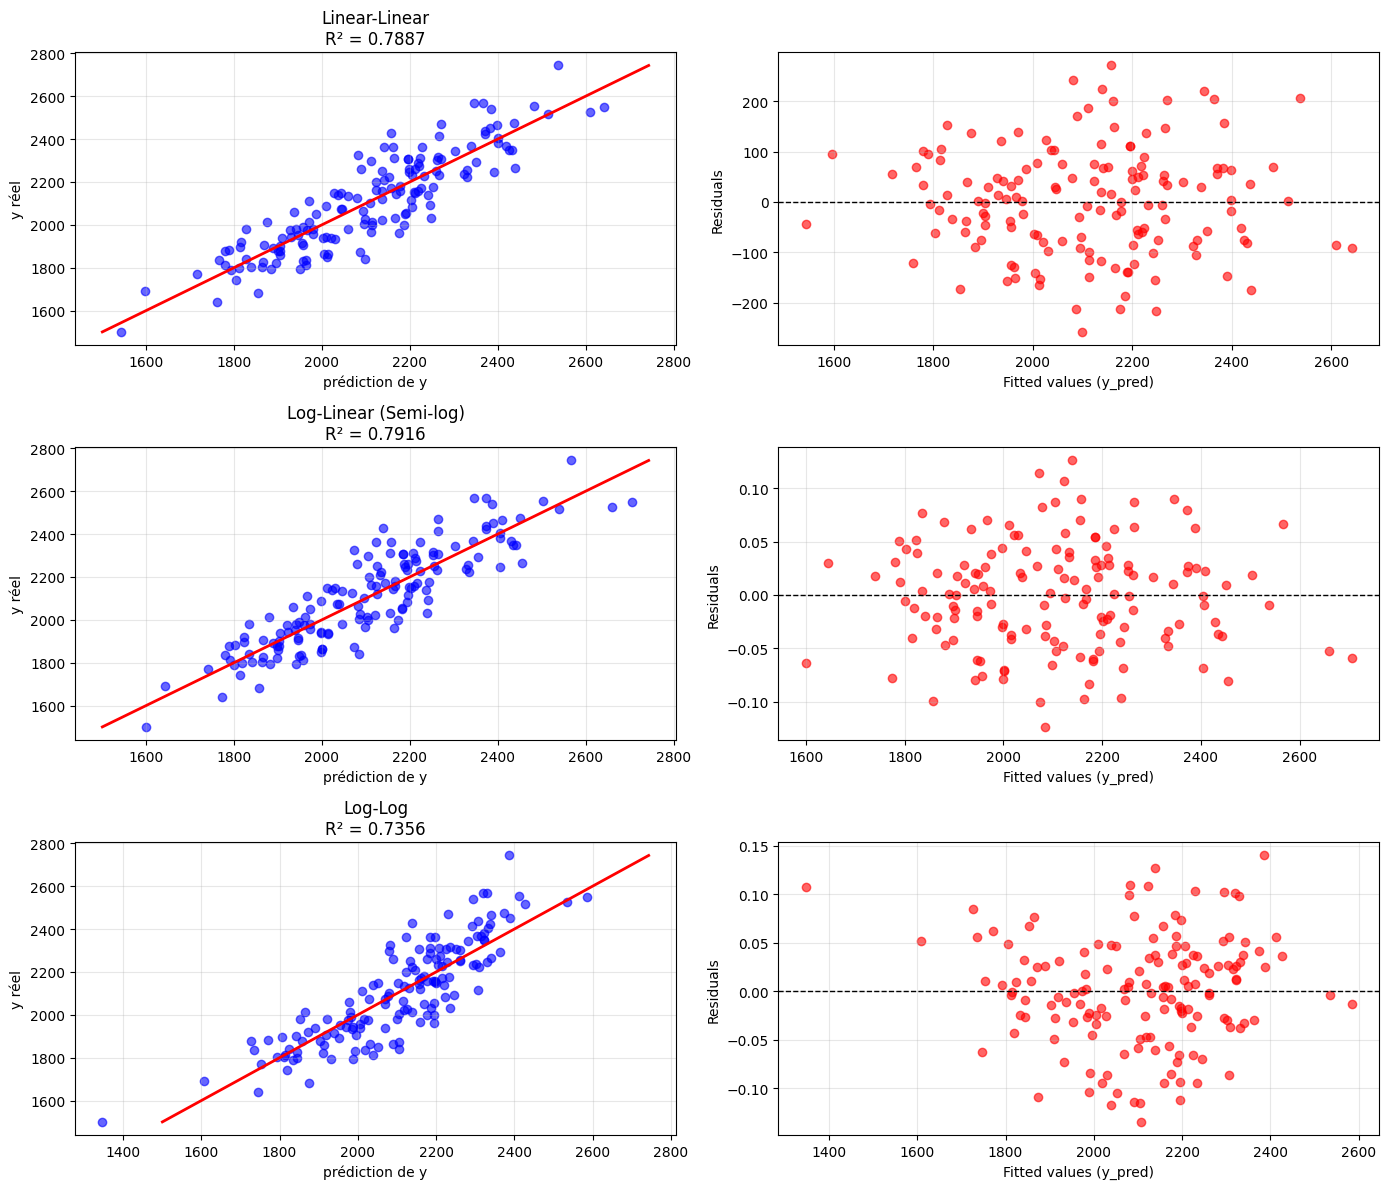

In [ ]:
# Exercise 4A: Visualize different functional forms

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

indices = range(len(y_multi))

# 1. Linear-Linear
X_multi_const = sm.add_constant(X_matrix)
y_pred = models['linear-linear'].predict(X_multi_const)
axes[0, 0].scatter(y_pred, y_multi, alpha=0.6, color='blue')
axes[0, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[0, 0].set_xlabel('prédiction de y')
axes[0, 0].set_ylabel('y réel')
axes[0, 0].set_title(f'Linear-Linear\nR² = {models["linear-linear"].rsquared:.4f}')
axes[0, 0].grid(True, alpha=0.3)

lin_residuals = models['linear-linear'].resid         # résidus : y_i - y_pred_i
axes[0, 1].scatter(y_pred, lin_residuals, alpha=0.6,color='red')
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Fitted values (y_pred)')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)


# 2. Log-Linear
X_multi_const = sm.add_constant(X_matrix)
log_y_pred = models['log-linear'].predict(sm.add_constant(X_multi_const))
y_pred_from_log = np.exp(log_y_pred)
axes[1, 0].scatter(y_pred_from_log, y_multi, alpha=0.6, color='blue')
axes[1, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[1, 0].set_xlabel('prédiction de y')
axes[1, 0].set_ylabel('y réel')
axes[1, 0].set_title(f'Log-Linear (Semi-log)\nR² = {models["log-linear"].rsquared:.4f}')
axes[1, 0].grid(True, alpha=0.3)

log_lin_residuals = models['log-linear'].resid     
axes[1, 1].scatter(y_pred_from_log, log_lin_residuals, alpha=0.6,color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Fitted values (y_pred)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

# 3. Linear-Log (non demandé par le prof)
'''X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
y_pred_log = models['linear-log'].predict(sm.add_constant(X_multi_log_const))
axes[1, 0].scatter(y_pred, y_multi, alpha=0.6, color='blue')
axes[1, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[1, 0].set_xlabel('prédiction de y')
axes[1, 0].set_ylabel('y réel')
axes[1, 0].set_title(f'Linear-Log\nR² = {models["linear-log"].rsquared:.4f}')
axes[1, 0].grid(True, alpha=0.3)'''

# 4. Log-Log
X_multi_log = np.log(X_matrix + 1e-6)
X_multi_log_const = sm.add_constant(X_multi_log)
log_y_pred_log = models['log-log'].predict(sm.add_constant(X_multi_log_const))
log_y_pred_from_log = np.exp(log_y_pred_log)
axes[2, 0].scatter(log_y_pred_from_log, y_multi, alpha=0.6, color='blue')
axes[2, 0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[2, 0].set_xlabel('prédiction de y')
axes[2, 0].set_ylabel('y réel')
axes[2, 0].set_title(f'Log-Log\nR² = {models["log-log"].rsquared:.4f}')
axes[2, 0].grid(True, alpha=0.3)

log_log_residuals = models['log-log'].resid     
axes[2, 1].scatter(log_y_pred_from_log, log_log_residuals, alpha=0.6,color='red')
axes[2, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2, 1].set_xlabel('Fitted values (y_pred)')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()



3. Diagnostics du modèle

3.1 Multicolinéarité

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#df sans prix
subdf = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur" ]]

# Ajouter une constante (intercept)
X = add_constant(subdf)

# Calcul du VIF
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif_df)

             variable           VIF
0               const  30387.380900
1          Surface_m2      1.555201
2            Chambres      1.555268
3  Annee_construction      1.026917
4  Distance_centre_km      1.024389
5               Etage      1.012863
6           Ascenseur      1.027848


3.4 Tests et inférence

In [17]:
print(models['log-linear'].summary())

                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.792
Model:                             OLS   Adj. R-squared:                  0.783
Method:                  Least Squares   F-statistic:                     90.56
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           3.31e-46
Time:                         15:13:46   Log-Likelihood:                 237.10
No. Observations:                  150   AIC:                            -460.2
Df Residuals:                      143   BIC:                            -439.1
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8413      0.726      8.04

In [ ]:
#Distance au centre à un effet négatif sur le prix. 
b4 = models['log-linear'].params['x4']
se_b4 = models['log-linear'].bse['x4']
t_stat = b4 / se_b4

# p-value unilatérale (effet négatif)
from scipy import stats
p_value_one_sided = stats.t.cdf(t_stat, df=model.df_resid)

print("b4 =", b4)
print("t =", t_stat)
print("p-value (b4 < 0) =", p_value_one_sided)

b4 = -0.0030101243173022915
t = -6.417324290587435
p-value (b4 < 0) = 9.533413435176781e-10


✅ Interprétation (cas le plus courant)
p-value	Interprétation
p < 0,01	Très forte évidence contre H₀
p < 0,05	Évidence significative contre H₀
p ≥ 0,05	Pas assez d’évidence pour rejeter H₀

B4 < inférieur à 0 très signiticatif, on peut rejetter H0 : B4 => 0. 

Perdu mon code pour la question : si tous coefficients nuls. 

Ajout des variables Qualite_ecole et Revenu_median_quartier. 

In [21]:
X_matrix_new = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur", "Qualite_ecole", "Revenu_median_quartier"]].values
X_matrix_new = np.column_stack([np.ones(len(df)), X_matrix_new])

X_multi_const_new = sm.add_constant(X_matrix_new)
Y_multi_log = np.log(y_multi)
models['log-linear-new-var'] = sm.OLS(Y_multi_log, X_multi_const_new).fit()

print(models['log-linear-new-var'].summary())


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.853
Model:                             OLS   Adj. R-squared:                  0.844
Method:                  Least Squares   F-statistic:                     102.1
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           8.53e-55
Time:                         15:13:46   Log-Likelihood:                 263.17
No. Observations:                  150   AIC:                            -508.3
Df Residuals:                      141   BIC:                            -481.2
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8302      0.615      9.48

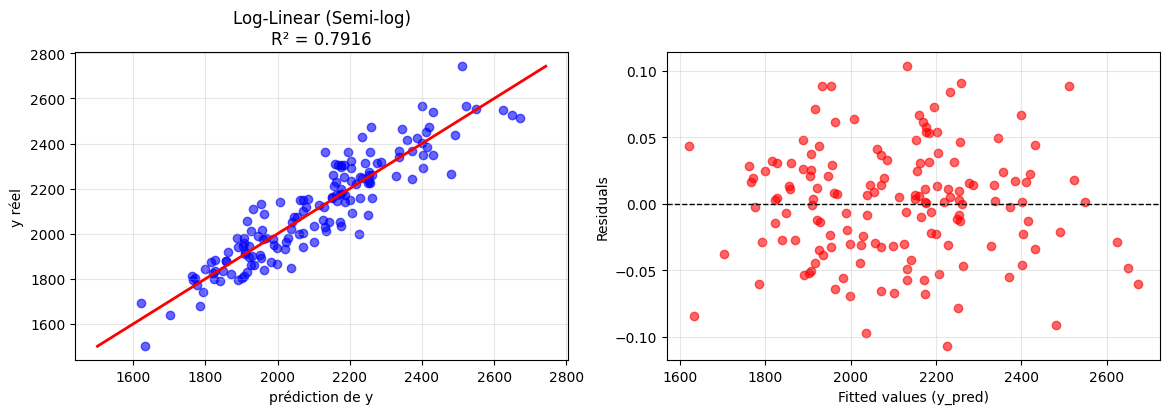

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
indices = range(len(y_multi))

# New Log-Linear
X_multi_const_new = sm.add_constant(X_matrix_new)
log_y_pred_new = models['log-linear-new-var'].predict(sm.add_constant(X_multi_const_new))
y_pred_from_log_new = np.exp(log_y_pred_new)
axes[0].scatter(y_pred_from_log_new, y_multi, alpha=0.6, color='blue')
axes[0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[0].set_xlabel('prédiction de y')
axes[0].set_ylabel('y réel')
axes[0].set_title(f'Log-Linear (Semi-log)\nR² = {models['log-linear-new-var'].rsquared:.4f}')
axes[0].grid(True, alpha=0.3)

log_lin_residuals_new = models['log-linear-new-var'].resid     
axes[1].scatter(y_pred_from_log_new, log_lin_residuals_new, alpha=0.6,color='red')
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Fitted values (y_pred)')
axes[1].set_ylabel('Residuals')
axes[1].grid(True, alpha=0.3)

4.1 Stabilité structurelle
Testez si le COVID a eu un effet sur le marché immobilier. 

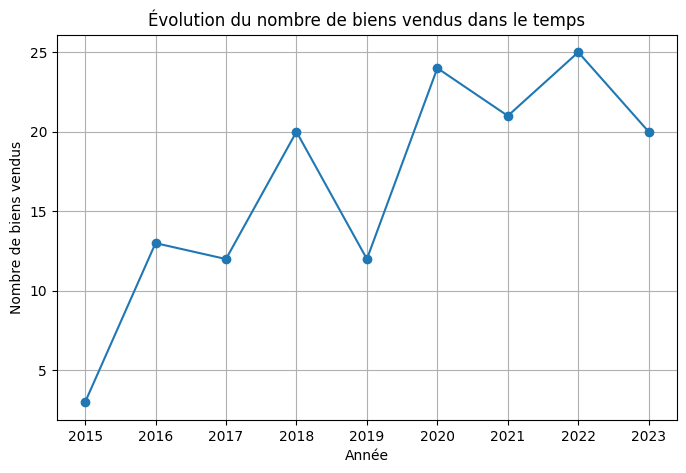

In [23]:
ventes_par_an = df.groupby("Annee_vente").size()

plt.figure(figsize=(8,5))
plt.plot(ventes_par_an.index, ventes_par_an.values, marker="o")
plt.xlabel("Année")
plt.ylabel("Nombre de biens vendus")
plt.title("Évolution du nombre de biens vendus dans le temps")
plt.grid(True)
plt.show()

In [24]:
X_matrix_cov = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur", "Qualite_ecole", "Revenu_median_quartier", "Annee_vente"]].values
X_matrix_cov = np.column_stack([np.ones(len(df)), X_matrix_cov])

X_multi_const_cov = sm.add_constant(X_matrix_cov)
Y_multi_log = np.log(y_multi)
models['log-linear-cov'] = sm.OLS(Y_multi_log, X_multi_const_cov).fit()

print(models['log-linear-cov'].summary())


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.900
Model:                             OLS   Adj. R-squared:                  0.894
Method:                  Least Squares   F-statistic:                     140.0
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           1.88e-65
Time:                         15:13:47   Log-Likelihood:                 292.17
No. Observations:                  150   AIC:                            -564.3
Df Residuals:                      140   BIC:                            -534.2
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7307      2.700     -5.82

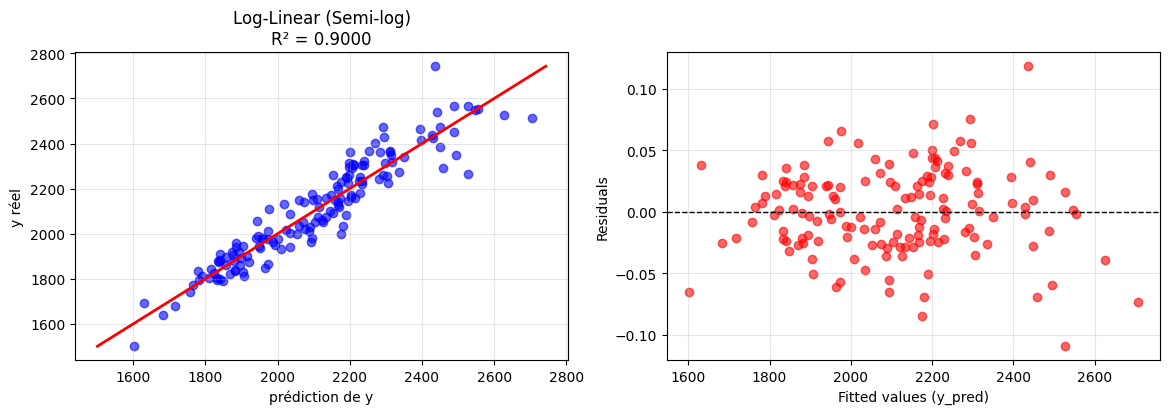

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
indices = range(len(y_multi))

# Cov Log-Linear
X_multi_const_cov = sm.add_constant(X_matrix_cov)
log_y_pred_cov = models['log-linear-cov'].predict(sm.add_constant(X_multi_const_cov))
y_pred_from_log_cov = np.exp(log_y_pred_cov)
axes[0].scatter(y_pred_from_log_cov, y_multi, alpha=0.6, color='blue')
axes[0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r-', linewidth=2)
axes[0].set_xlabel('prédiction de y')
axes[0].set_ylabel('y réel')
axes[0].set_title(f'Log-Linear (Semi-log)\nR² = {models['log-linear-cov'].rsquared:.4f}')
axes[0].grid(True, alpha=0.3)

log_lin_residuals_cov = models['log-linear-cov'].resid     
axes[1].scatter(y_pred_from_log_cov, log_lin_residuals_cov, alpha=0.6,color='red')
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Fitted values (y_pred)')
axes[1].set_ylabel('Residuals')
axes[1].grid(True, alpha=0.3)

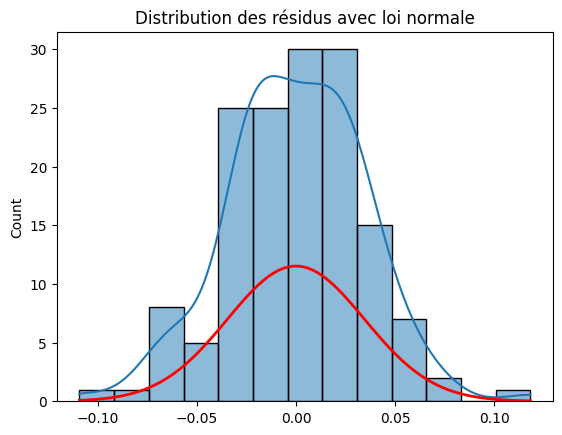

In [26]:
#vérifier si résidus sont normaux
sns.histplot(log_lin_residuals_cov, kde=True)

# Générer la loi normale
mu, sigma = log_lin_residuals_cov.mean(), log_lin_residuals_cov.std()
x = np.linspace(log_lin_residuals_cov.min(), log_lin_residuals_cov.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2, label='Loi normale')

plt.title("Distribution des résidus avec loi normale")
plt.show()

Calculer la variance des résidus. 

In [27]:
# Variance simple
var_residus = np.var(log_lin_residuals_cov, ddof=0)  # ddof=0 → diviser par n
print("Variance (population):", var_residus)

# Variance corrigée (échantillon, non biaisée)
var_residus_corrigee = np.var(log_lin_residuals_cov, ddof=models['log-linear-cov'].df_model + 1)  # df_model = k
print("Variance corrigée:", var_residus_corrigee)

Variance (population): 0.0011903928451352064
Variance corrigée: 0.001275420905502007


Hétéroscédascité : pas sûre de la conclusion. 

Vérification d'une rupture structurelle. 

In [28]:
from statsmodels.stats.diagnostic import breaks_cusumolsresid

test = breaks_cusumolsresid(models['log-linear-cov'].resid, ddof=models['log-linear-cov'].df_model)
print(test)

(np.float64(0.5327288533504986), np.float64(0.9390922972616793), [(1, 1.63), (5, 1.36), (10, 1.22)])


In [ ]:
df_before2019 = df[df["Annee_vente"] < 2019]

#Model before 2019
X_matrix_before = df_before2019[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur", "Qualite_ecole", "Revenu_median_quartier", "Annee_vente"]].values
X_matrix_before = np.column_stack([np.ones(len(df_before2019)), X_matrix_before])
X_multi_const_before = sm.add_constant(X_matrix_before)

y_multi_before = df_before2019["Prix_milliers_euros"]
Y_multi_log_before = np.log(y_multi_before)

models['log-linear-before2019'] = sm.OLS(Y_multi_log_before, X_multi_const_before).fit()

print(models['log-linear-before2019'].summary())


                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.923
Model:                             OLS   Adj. R-squared:                  0.904
Method:                  Least Squares   F-statistic:                     50.29
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           2.26e-18
Time:                         15:13:47   Log-Likelihood:                 96.024
No. Observations:                   48   AIC:                            -172.0
Df Residuals:                       38   BIC:                            -153.3
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0837     12.663     -0.32

In [30]:
df_after2019 = df[df["Annee_vente"] >= 2019]

#Model before 2019
X_matrix_after = df_after2019[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur", "Qualite_ecole", "Revenu_median_quartier", "Annee_vente"]].values
X_matrix_after = np.column_stack([np.ones(len(df_after2019)), X_matrix_after])
X_multi_const_after = sm.add_constant(X_matrix_after)

y_multi_after = df_after2019["Prix_milliers_euros"]
Y_multi_log_after = np.log(y_multi_after)

models['log-linear-after2019'] = sm.OLS(Y_multi_log_after, X_multi_const_after).fit()

print(models['log-linear-after2019'].summary())

                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.898
Model:                             OLS   Adj. R-squared:                  0.888
Method:                  Least Squares   F-statistic:                     89.76
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           1.28e-41
Time:                         15:13:47   Log-Likelihood:                 204.07
No. Observations:                  102   AIC:                            -388.1
Df Residuals:                       92   BIC:                            -361.9
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2157      5.674     -3.03

In [31]:
coef_table = pd.DataFrame({
    "Coef_before2019": models['log-linear-before2019'].params,
    "p_before2019": models['log-linear-before2019'].pvalues,
    "Coef_after2019": models['log-linear-after2019'].params,
    "p_after2019": models['log-linear-after2019'].pvalues
})

# Afficher le tableau
print(coef_table)

       Coef_before2019  p_before2019  Coef_after2019   p_after2019
const        -4.083667  7.488484e-01      -17.215750  3.137959e-03
x1            0.002224  3.320122e-14        0.001865  1.732837e-27
x2            0.021738  4.789080e-03        0.013965  5.171475e-04
x3            0.000728  1.931912e-01        0.000944  2.611205e-03
x4           -0.003444  5.243596e-06       -0.003444  1.719887e-13
x5            0.006132  1.023852e-01        0.002944  1.250941e-01
x6            0.036137  4.184727e-03        0.025679  4.929210e-04
x7            0.007535  5.586050e-02        0.010856  1.139904e-05
x8            0.001656  2.554931e-02        0.001253  1.219453e-02
x9            0.004856  4.305546e-01        0.011196  1.248885e-04


Selon CHATGPT : constante devient significative après 2019, signe indirect de rupture structurelle. Contredit le résultat de mon test initial (pas de rupture).

In [32]:
residuals_before2019 = models['log-linear-before2019'].resid   
residuals_after2019 = models['log-linear-after2019'].resid   

# Variance simple
var_residuals_bef = np.var(residuals_before2019, ddof=0)  # ddof=0 → diviser par n
var_residuals_aft = np.var(residuals_after2019, ddof=0)  # ddof=0 → diviser par n
print("Variance (population):", var_residuals_bef, var_residuals_aft)

# Variance corrigée (échantillon, non biaisée)
var_residuals_corr_bef = np.var(residuals_before2019, ddof=models['log-linear-before2019'].df_model + 1)  # df_model = k
var_residuals_corr_aft = np.var(residuals_after2019, ddof=models['log-linear-before2019'].df_model + 1)  # df_model = k
print("Variance corrigée :", var_residuals_corr_bef, var_residuals_corr_aft)

Variance (population): 0.0010713149736568822 0.0010708089551005964
Variance corrigée : 0.0013532399667244828 0.001187201232828922


5.3 MCO standard, MCO écart-type robustes, WLS

In [33]:
print("MCO standard :")
print(models['log-linear-cov'].summary())

MCO standard :
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.900
Model:                             OLS   Adj. R-squared:                  0.894
Method:                  Least Squares   F-statistic:                     140.0
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           1.88e-65
Time:                         15:13:48   Log-Likelihood:                 292.17
No. Observations:                  150   AIC:                            -564.3
Df Residuals:                      140   BIC:                            -534.2
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7307      

In [34]:
model_hc3 = models['log-linear-cov'].get_robustcov_results(cov_type='HC3')
print("MCO avec écart-type robustes :")
print(model_hc3.summary())

MCO avec écart-type robustes :
                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.900
Model:                             OLS   Adj. R-squared:                  0.894
Method:                  Least Squares   F-statistic:                     110.7
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           3.81e-59
Time:                         15:13:48   Log-Likelihood:                 292.17
No. Observations:                  150   AIC:                            -564.3
Df Residuals:                      140   BIC:                            -534.2
Df Model:                            9                                         
Covariance Type:                   HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

Confused about WLS. 

Test d'autocorrélation. 

In [35]:
from statsmodels.stats.stattools import durbin_watson

residuals = models['log-linear-cov'].resid
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 2.2113823876334484


≈2	Pas d’autocorrélation
< 2	Autocorrélation positive (résidus suivent la même direction)
> 2	Autocorrélation négative (résidus alternent de signe)
Comme pour l’autocorrélation positive, une autocorrélation négative fausse les p-values et rend les tests classiques moins fiables.
Solution : utiliser HAC (Newey-West) ou un modèle qui tient compte de la corrélation des erreurs.

In [36]:
model_hac = models['log-linear-cov'].get_robustcov_results(cov_type='HAC', maxlags=5)
print(model_hac.summary())

                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.900
Model:                             OLS   Adj. R-squared:                  0.894
Method:                  Least Squares   F-statistic:                     120.6
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           2.05e-61
Time:                         15:13:48   Log-Likelihood:                 292.17
No. Observations:                  150   AIC:                            -564.3
Df Residuals:                      140   BIC:                            -534.2
Df Model:                            9                                         
Covariance Type:                   HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7307      2.481     -6.34

6. Endogénéité et Variables Instrumentales

Qualite_ecole influence et se fait influencer par Revenu_median_quartier => Qualite_ecole endogène. 

Une variable instrumentale est une “proxy sûre” pour une variable endogène : elle explique la variable endogène, mais n’influence pas directement la variable dépendante.

On explique la variable endogène X par l'instrument Z. 
Première étape : régression où X variable dépendante de Z. 
On récupère les valeurs prédites de X, X_hat. 
On remplace X par X_hat dans notre modèle semi_log_covid. 

In [37]:
#régression X - Z
X_endog = df["Qualite_ecole"]
Z_instr = df["Distance_universite"]

Z_instr = sm.add_constant(Z_instr)
models['linear-instr'] = sm.OLS(X_endog, Z_instr).fit()

print(models['linear-instr'].summary())

                            OLS Regression Results                            
Dep. Variable:          Qualite_ecole   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     36.36
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.25e-08
Time:                        15:13:48   Log-Likelihood:                -289.61
No. Observations:                 150   AIC:                             583.2
Df Residuals:                     148   BIC:                             589.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2544    

F = 36.36 > 10 
F ≫ 10 → pas d’instrument faible
L'instrument explique bien X. 

In [38]:
df["Qualite_ecole_corr"] = models['linear-instr'].fittedvalues

In [39]:
#Model with "Qualite_ecole_corr"
X_matrix = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur", "Qualite_ecole_corr", "Revenu_median_quartier", "Annee_vente"]].values
X_matrix = np.column_stack([np.ones(len(df)), X_matrix])
X_multi_const = sm.add_constant(X_matrix)

y_multi = df["Prix_milliers_euros"]
Y_multi_log = np.log(y_multi)

models['log-linear-cov-2'] = sm.OLS(Y_multi_log, X_multi_const).fit()

print(models['log-linear-cov-2'].summary())

                             OLS Regression Results                            
Dep. Variable:     Prix_milliers_euros   R-squared:                       0.885
Model:                             OLS   Adj. R-squared:                  0.877
Method:                  Least Squares   F-statistic:                     119.3
Date:                 Tue, 23 Dec 2025   Prob (F-statistic):           4.06e-61
Time:                         15:19:47   Log-Likelihood:                 281.41
No. Observations:                  150   AIC:                            -542.8
Df Residuals:                      140   BIC:                            -512.7
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.0731      2.902     -5.53

Comparez les coefficients MCO et IV. Y a-t-il des différences importantes ? 
=> didn't do it. 

7. Régularisation. 

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#normalisation des variables
X_matrix = df[["Surface_m2", "Chambres", "Annee_construction", "Distance_centre_km", "Etage", "Ascenseur", "Qualite_ecole_corr", "Revenu_median_quartier", "Annee_vente"]].values
y_multi = df["Prix_milliers_euros"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

In [41]:
lambdas = [0.01, 0.1, 1, 10, 100]

In [44]:
#modèle Ridge
results = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_scaled, y)
    
    results.append({
        'lambda': l,
        'coef_X1': ridge.coef_[0],
        'coef_X2': ridge.coef_[1],
        'coef_X3': ridge.coef_[2],
        'coef_X4': ridge.coef_[3],
        'coef_X5': ridge.coef_[4],
        'coef_X6': ridge.coef_[5],
        'coef_X7': ridge.coef_[6],
        'coef_X8': ridge.coef_[7],
        'coef_X9': ridge.coef_[8],
        'intercept': ridge.intercept_
    })

results_df = pd.DataFrame(results)
print(results_df)

   lambda     coef_X1    coef_X2    coef_X3    coef_X4    coef_X5    coef_X6  \
0    0.01  161.469479  35.390069  18.856428 -64.571937  13.974049  27.705346   
1    0.10  161.338301  35.451068  18.838045 -64.530785  13.972947  27.675561   
2    1.00  160.043611  36.046731  18.656633 -64.122554  13.961567  27.381060   
3   10.00  148.575488  40.789979  17.053270 -60.341113  13.816739  24.734568   
4  100.00   93.743499  47.264042   9.689272 -38.685328  11.464403  12.090212   

    coef_X7    coef_X8    coef_X9  intercept  
0  1.132669  47.609631  49.429500  2107.9048  
1  1.146720  47.576593  49.399834  2107.9048  
2  1.285275  47.248919  49.105231  2107.9048  
3  2.494528  44.221566  46.350708  2107.9048  
4  6.554520  27.405839  29.988238  2107.9048  


Quand λ augmente :
- les coefficients se rapprochent de 0
- la variance diminue
- le biais augmente

Notez que la régression Ridge ne réduit pas chaque coefficient à partir de la même valeur. Au contraire, les coefficients sont réduits proportionnellement à leur taille initiale. Lorsque λ augmente, les coefficients de valeur élevée diminuent plus rapidement que les coefficients de faible valeur.7 Les coefficients élevés sont donc plus pénalisés que les coefficients faibles.

Notez que la pénalité L2 réduit les coefficients vers zéro, mais jamais vers le zéro absolu. Bien que les poids des caractéristiques du modèle puissent devenir si petits qu’ils en sont négligeables, ils ne sont jamais égaux à zéro dans la régression Ridge. La régularisation L1 fonctionne en réduisant les coefficients à zéro, éliminant essentiellement ces variables indépendantes du modèle.

La régression Lasso réduit le nombre de variables indépendantes affectant le résultat. La régression de crête (Ridge) réduit le poids de chaque variable indépendante sur le résultat.

In [47]:
results = []

for l in lambdas:
    lasso = Lasso(alpha=l, max_iter=10000)
    lasso.fit(X_scaled, y)
    
    results.append({
        'lambda': l,
        'coef_X1': lasso.coef_[0],
        'coef_X2': lasso.coef_[1],
        'coef_X3': lasso.coef_[2],
        'coef_X4': lasso.coef_[3],
        'coef_X5': lasso.coef_[4],
        'coef_X6': lasso.coef_[5],
        'coef_X7': lasso.coef_[6],
        'coef_X8': lasso.coef_[7],
        'coef_X9': lasso.coef_[8],
        'intercept': lasso.intercept_
    })

results_df = pd.DataFrame(results)
print(results_df)

   lambda     coef_X1    coef_X2    coef_X3    coef_X4    coef_X5    coef_X6  \
0    0.01  161.480763  35.378408  18.847483 -64.564911  13.963991  27.695696   
1    0.10  161.422796  35.350735  18.746485 -64.461186  13.872805  27.577361   
2    1.00  160.843129  35.074012  17.736512 -63.423931  12.960946  26.394011   
3   10.00  154.637327  31.892645   7.657072 -53.286234   4.458909  14.362834   
4  100.00   89.448186   0.000000   0.000000  -0.000000   0.000000   0.000000   

    coef_X7    coef_X8    coef_X9  intercept  
0  1.122975  47.606454  49.421681  2107.9048  
1  1.051066  47.544859  49.322529  2107.9048  
2  0.331974  46.928907  48.331009  2107.9048  
3  0.000000  38.711595  38.624282  2107.9048  
4  0.000000   0.000000   0.000000  2107.9048  


Contrairement à Ridge :
Lasso = sélection
Ridge = réduction
L’estimation Lasso montre que lorsque le paramètre de régularisation λ augmente, certains coefficients sont pénalisés jusqu’à devenir nuls, indiquant une sélection automatique des variables.

Ne garde que surface. 

In [53]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.01,0.1,1,10,100], cv=10)
ridge_cv.fit(X_scaled, y_multi)

print("Meilleur alpha :", ridge_cv.alpha_)

Meilleur alpha : 1.0


In [54]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.01,0.1,1,10,100], cv=10, max_iter=10000)
lasso_cv.fit(X_scaled, y_multi)

print("Meilleur alpha :", lasso_cv.alpha_)

Meilleur alpha : 1.0


Comparez les résultats de trois modèles sur votre jeu de données. Divisez en train et test (80%
- 20%) et comparez les erreurs de prédiction (RMSE) sur l’échantillon de test.

=> need to catch on the theory. 

Discussion : Pourquoi les écarts-types et tests classiques ne sont-ils pas valides après
Lasso ?

=> suppression des variables de la régression par réduction de leurs coefficients à 0 ?

8. Prévisions